In [1]:
import pandas as pd
import os
import numpy as np

# data- preprocessing

In [2]:
# Define the directory containing your CSV files
# place the link to the text file here
# directory = '/Users/martinso/Desktop/LST/HS-KI/Year 2/research trend/text'
directory = r'C:\awilde\katja\Dokumente\Studium\Schweden\HealthInformatics_KarolinskaUni\Lectures\03_Semester\TrendsInHI\SU_project\text'

data = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Initialize a list to store each row's text as a list of words
        texts = []

        # Loop through each row in the DataFrame
        for index, row in df.iterrows():
            # Check for NaN and add text to the list after splitting into words
            if pd.notna(row['Text']):
                # Split the text into words and append the list of words
                texts.append(row['Text'].split())

        # Append the filename (without extension) and the list of texts to the data list
        data.append([os.path.splitext(filename)[0], texts])

# Create a DataFrame from the collected data
df_combined = pd.DataFrame(data, columns=['File Name', 'Text Data'])

# Define the path for the output Excel file
#output_file_path = os.path.join(directory, 'aggregated_texts_by-sentence.xlsx')

# Save the DataFrame to Excel
#df_combined.to_excel(output_file_path, index=False)


#print("All files have been processed and output to 'aggregated_texts.csv'.")

In [3]:
df_combined.head()

,File Name,Text Data
0,300_Transcript,"[[so, I'm, going, to], [interview, in, Spanish..."
1,301_Transcript,"[[yeah, there's, also, on, Craigslist, so, tha..."
2,302_Transcript,"[[just, move, around, a, little, bit], [when, ..."
3,303_Transcript,"[[wow, okay], [when, you're, finished, when, s..."
4,304_Transcript,"[[so, we'll, just, move, around, a, little, bi..."


In [4]:
df_combined.rename(columns={'File Name': 'Name'}, inplace=True)
df_combined['Name'] = df_combined['Name'].str.replace('_Transcript', '')
df_combined['Name']=df_combined['Name'].astype(int)

In [5]:
df_combined.head()

,Name,Text Data
0,300,"[[so, I'm, going, to], [interview, in, Spanish..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha..."
2,302,"[[just, move, around, a, little, bit], [when, ..."
3,303,"[[wow, okay], [when, you're, finished, when, s..."
4,304,"[[so, we'll, just, move, around, a, little, bi..."


In [6]:
df = pd.read_csv('label_daic_extend - label_daic_extend.csv')
df.head()
df_filtered = df[['Participant_ID','depression']]

In [7]:
depression_map = df_filtered.set_index('Participant_ID')['depression']

df_combined['depression'] = df_combined['Name'].map(depression_map)




In [8]:
df_combined

,Name,Text Data,depression
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0
2,302,"[[just, move, around, a, little, bit], [when, ...",0
3,303,"[[wow, okay], [when, you're, finished, when, s...",0
4,304,"[[so, we'll, just, move, around, a, little, bi...",0
...,...,...,...
214,698,"[[going, to, press, that, button, it, just, me...",1
215,702,"[[hi], [I'm, not, a, therapist], [are, you, ok...",0
216,703,"[[and, please], [are, you, okay, with, this, y...",0
217,707,"[[okay, but, but, okay, but, I, don't, stop, u...",0


Percentage of interviewee with depression

In [9]:
# Calculate value counts for depression labels
value_counts = df_combined['depression'].value_counts()

# Calculate percentage for each label
percentages = (value_counts / value_counts.sum()) * 100
print(f"Percentage of patients without depression: {percentages[0]:.2f}%")
print(f"Percentage of patients with depression: {percentages[1]:.2f}%")

Percentage of patients without depression: 70.32%
Percentage of patients with depression: 29.68%


It seem like there is a imbalanced class in the data, we should take account of that when we try to build up the ML model.

In [10]:
df_combined['lengths of speech'] = df_combined['Text Data'].apply(lambda x: [len(lst) for lst in x])
# Count the number of inner lists in each cell and create a new column
df_combined['frequency of speech'] = df_combined['Text Data'].apply(len)

In [11]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80


Here i try to calculate the frequency of interviewees speak in the interview and the length of their speech per times

In [12]:
def calculate_mean(lengths):
    if len(lengths) > 0:  # Check if the list is not empty to avoid division by zero
        return sum(lengths) / len(lengths)
    else:
        return None
    
df_combined['mean length of speech'] = df_combined['lengths of speech'].apply(calculate_mean)

In [13]:
mean_values = df_combined.groupby('depression')[['frequency of speech', 'mean length of speech']].mean()

print(mean_values)

            frequency of speech  mean length of speech
depression                                            
0                     88.642857              15.954897
1                    105.553846              14.008058


There is a significant difference in frequency of speech

In [14]:
def flatten_text(row):
    # This will flatten the list of lists found in 'Text Data' for a row
    flattened = [item for sublist in row['Text Data'] for item in sublist]
    return flattened  # Returning the flattened list directly

# Apply this function and create a new column
df_combined['flattened text'] = df_combined.apply(flatten_text, axis=1)


In [15]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that..."
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you..."
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'..."
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit..."


In [16]:
def mean_word_length(words):
    if not words:  # Check if the list is empty
        return 0
    return sum(len(word) for word in words) / len(words)

# Apply the function to calculate the mean word length for each row
df_combined['mean_word_length'] = df_combined['flattened text'].apply(mean_word_length)

In [17]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_combined is already defined and includes the necessary columns
# Convert 'depression' to a categorical type if it's not already
df_combined['depression'] = df_combined['depression'].astype('category')

def visualize(col):
    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # figsize can be adjusted based on your display preferences

    # First plot: Boxplot
    sns.boxplot(ax=axes[0], y=df_combined[col], x=df_combined['depression'],hue=df_combined['depression'])
    axes[0].set_ylabel(col, labelpad=12.5)
    axes[0].set_xlabel('Depression')
    
    # Second plot: KDE Plot
    sns.kdeplot(ax=axes[1], x=df_combined[col], hue=df_combined['depression'], common_norm=False)
    plt.legend(title='Depression', labels=df_combined['depression'].cat.categories)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
# visualize('mean_word_length')  # replace 'mean_word_length' with the actual column name you want to plot


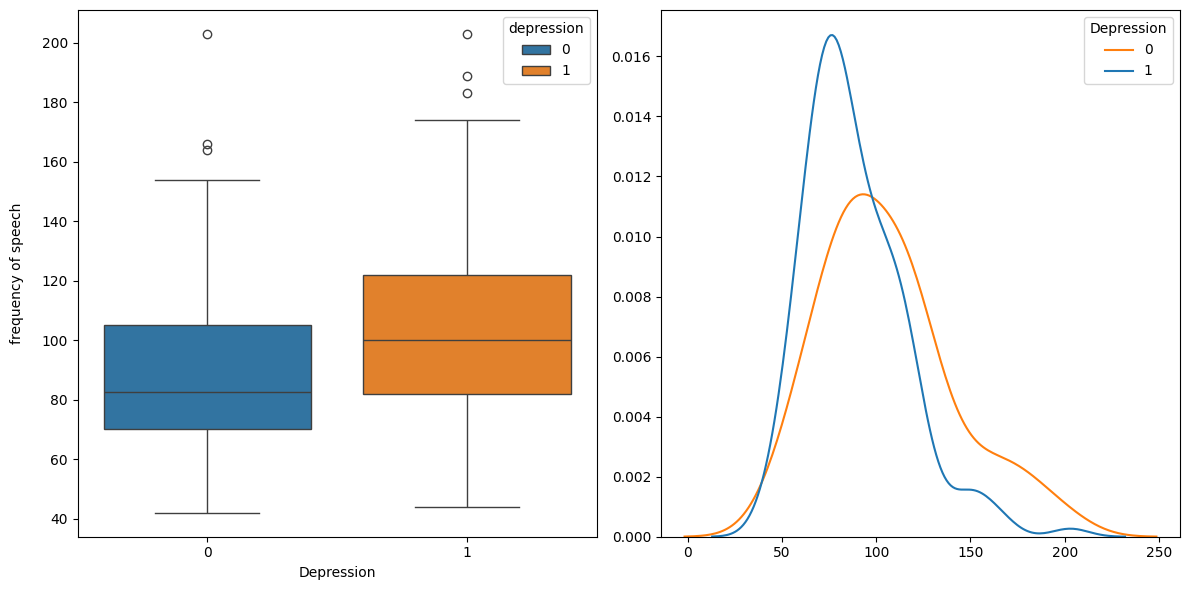

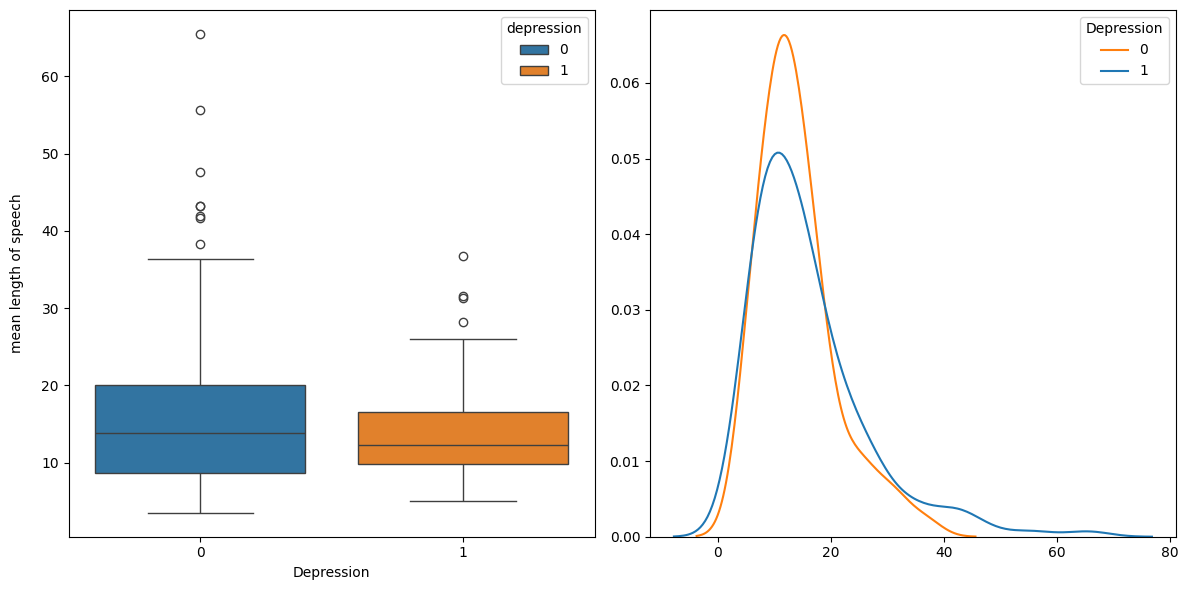

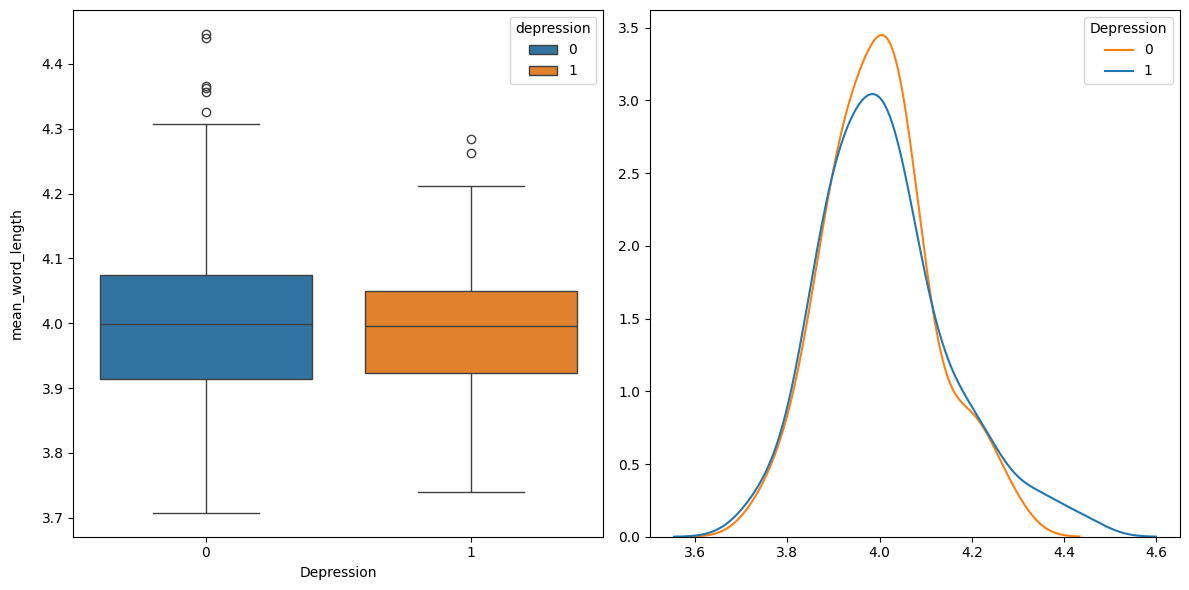

In [19]:
features = ['frequency of speech','mean length of speech','mean_word_length']
for feature in features:
    visualize(feature)

Further analysis of the speech of interviewees, it seem like there is a higher chance for interviewee with depression to have a shorter speech per times.

In the following I will try to normalise the text, and show the importance of normalisation 

In [20]:
import pandas as pd
import re

def find_apostrophe_words(text_list):
    # Regex pattern to find words with apostrophes
    pattern = r"\b\w+'(?:\w+|t)\b|\B'\w+\b"
    apo_terms = []  # Initialize an empty list to collect all terms
    for item in text_list:
        # Find all matches and extend them to the apo_terms list
        apo_terms.extend(re.findall(pattern, item))
    return apo_terms

# Assuming df_combined['flattened text'] contains lists of strings
all_words_with_apostrophes = [word for text in df_combined['flattened text'].dropna() for word in find_apostrophe_words(text)]

# Convert list to a set to remove duplicates, then back to list to print or use further
unique_words_with_apostrophes = list(set(all_words_with_apostrophes))

# Print unique words
print(unique_words_with_apostrophes)

["i've", "it'll", "kid's", "uncle's", "weren't", "boyfriend's", "school's", "back's", "What's", "Japan's", "thing's", "That's", "she'd", "who'd", "everybody's", "God's", "person's", "Mexico's", "Frank's", "Grauman's", "women's", "Kelly's", "Bachelor's", "Domino's", "It's", "Square's", "something's", "y'all", "Lowe's", "Fisherman's", "dad's", "Oklahoma's", "she's", "hadn't", "heart's", "mind's", "sister's", "mother's", "how's", "Brett's", "wasn't", "I'll", "Wendy's", "Ernie's", "life's", "Year's", "Mother's", "Happy's", "I'm", "church's", "She's", "night's", "s'more", "someone's", "here's", "body's", "master's", "He's", "you'd", "cat's", "husband's", "woman's", "Musician's", "let's", "Morocco's", "guy's", "we'll", "Esmeralda's", "it'd", "baby's", "wouldn't", "Alzheimer's", "where's", "Lord's", "I'd", "they're", "how'd", "girl's", "stepfather's", "son's", "workman's", "city's", "we've", "they'll", "area's", "castaneda's", "didn't", "Sophie's", "Django's", "doctor's", "whatever's", "You'r

In [21]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def tokenize_and_flatten(text_list):
    tokenized_list = [tokenizer.tokenize(word) for word in text_list]
    # Flatten the list of lists into a single list
    flat_list = [item for sublist in tokenized_list for item in sublist]
    return flat_list

# Apply the tokenizer to the 'flattened text' column and store the results in a new column
df_combined['tokenized_text'] = df_combined['flattened text'].apply(tokenize_and_flatten)



In [22]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th..."
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you..."
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh..."
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b..."


In [23]:
all_words_with_apostrophes = [word for text in df_combined['tokenized_text'].dropna() for word in find_apostrophe_words(text)]

# Convert list to a set to remove duplicates, then back to list to print or use further
unique_words_with_apostrophes = list(set(all_words_with_apostrophes))

# Print unique words
print(unique_words_with_apostrophes)

["'re", "n't", "'ve", "y'all", "I'ma", "'ll", "s'more", "ma'am", "'d", "'m", "y'alls", "'s", "Hold'em"]


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
contractions_dict = {
    "'s": "is",     # depending on context, can also be 'has' or possessive marker
    "n't": "not",
    "'m": "am",
    "'d": "would",  # can also mean "had" depending on context
    "'ve": "have",
    "s'more": "some more" ,
    "Hold'em": "hold them",
    "y'alls": "you alls",
    "I'ma": "I am going to",
    "'ll": "will",
    "ma'am": "madam",
    "'re": "are",
    "y'all": "you all"
}

import pandas as pd

# Assume 'df_combined' is your DataFrame and contractions_dict is defined as provided

def expand_contractions(tokens, contractions_dict):
    expanded_tokens = []
    for token in tokens:
        # Check each token if it's a contraction
        if token.lower() in contractions_dict:
            # If it is, replace it with the expanded form
            expanded_tokens.extend(contractions_dict[token.lower()].split())
        else:
            # Otherwise, keep the token as is
            expanded_tokens.append(token)
    return expanded_tokens

# Apply this function to each row in the tokenized_text column
df_combined['expanded_text'] = df_combined['tokenized_text'].apply(lambda x: expand_contractions(x, contractions_dict))
df_combined['expanded_text']  =df_combined['expanded_text'].apply(lambda x: ' '.join(x))
df_combined['expanded_text'] = df_combined['expanded_text'].apply(lambda x: x.split())



In [26]:
df_combined.head()

,Name,Text Data,depression,lengths of speech,frequency of speech,mean length of speech,flattened text,mean_word_length,tokenized_text,expanded_text
0,300,"[[so, I'm, going, to], [interview, in, Spanish...",0,"[4, 3, 1, 1, 2, 5, 3, 8, 3, 2, 1, 2, 6, 22, 7,...",77,4.181818,"[so, I'm, going, to, interview, in, Spanish, o...",4.068323,"[so, I, 'm, going, to, interview, in, Spanish,...","[so, I, am, going, to, interview, in, Spanish,..."
1,301,"[[yeah, there's, also, on, Craigslist, so, tha...",0,"[8, 1, 10, 4, 2, 9, 3, 4, 13, 5, 15, 1, 19, 22...",72,19.430556,"[yeah, there's, also, on, Craigslist, so, that...",3.961401,"[yeah, there, 's, also, on, Craigslist, so, th...","[yeah, there, is, also, on, Craigslist, so, th..."
2,302,"[[just, move, around, a, little, bit], [when, ...",0,"[6, 3, 5, 5, 3, 4, 2, 1, 5, 10, 3, 13, 8, 25, ...",99,6.151515,"[just, move, around, a, little, bit, when, you...",4.096880,"[just, move, around, a, little, bit, when, you...","[just, move, around, a, little, bit, when, you..."
3,303,"[[wow, okay], [when, you're, finished, when, s...",0,"[2, 6, 1, 2, 9, 3, 14, 19, 2, 43, 4, 11, 6, 2,...",94,20.382979,"[wow, okay, when, you're, finished, when, she'...",3.914927,"[wow, okay, when, you, 're, finished, when, sh...","[wow, okay, when, you, are, finished, when, sh..."
4,304,"[[so, we'll, just, move, around, a, little, bi...",0,"[26, 10, 2, 8, 3, 4, 9, 2, 1, 4, 5, 8, 2, 18, ...",80,12.400000,"[so, we'll, just, move, around, a, little, bit...",4.021169,"[so, we, 'll, just, move, around, a, little, b...","[so, we, will, just, move, around, a, little, ..."


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


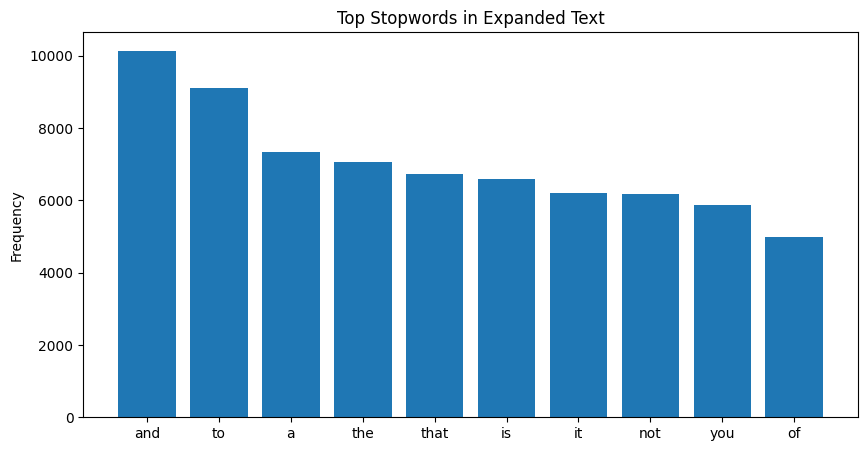

In [27]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
import pandas as pd
import nltk

nltk.download('stopwords')

# Set up stopwords
stop = set(stopwords.words('english'))

# Assuming 'expanded_text' is already a list of words per document
# If 'expanded_text' is not a list of words, uncomment the following line:
# df_combined['expanded_text'] = df_combined['expanded_text'].apply(lambda x: x.split())

# Flatten the list of lists into a single list of words
corpus = [word for sublist in df_combined['expanded_text'] for word in sublist]

# Dictionary to count occurrences of each stopword
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

# Sorting the dictionary by frequency of stopwords and getting the top 10
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = zip(*top)  # Unpack the top words and their counts

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title('Top Stopwords in Expanded Text')
plt.ylabel('Frequency')
plt.show()



In [28]:
from collections import Counter

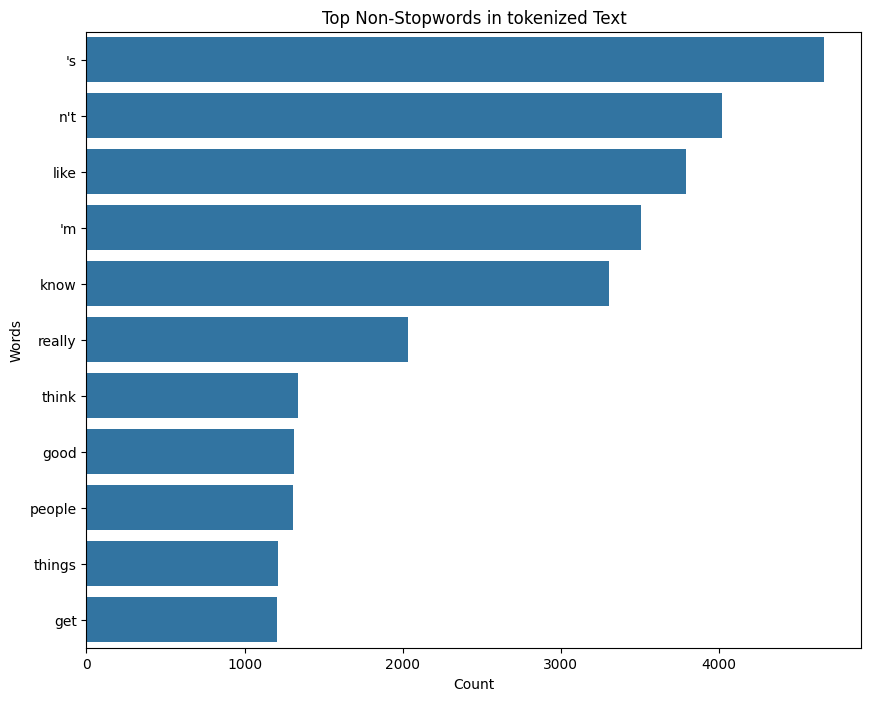

In [29]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    # Flatten the list of lists into a single list if necessary
    # Assuming 'text' is a list of lists of words; if not, comment out the next two lines
    text = [word for sublist in text for word in sublist]
    
    counter = Counter(text)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
        if word.lower() not in stop:  # Check against stopwords using lowercased words
            x.append(word)
            y.append(count)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=y, y=x)
    plt.title('Top Non-Stopwords in tokenized Text')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

# Apply the function to the 'expanded_text' column
plot_top_non_stopwords_barchart(df_combined['tokenized_text'])


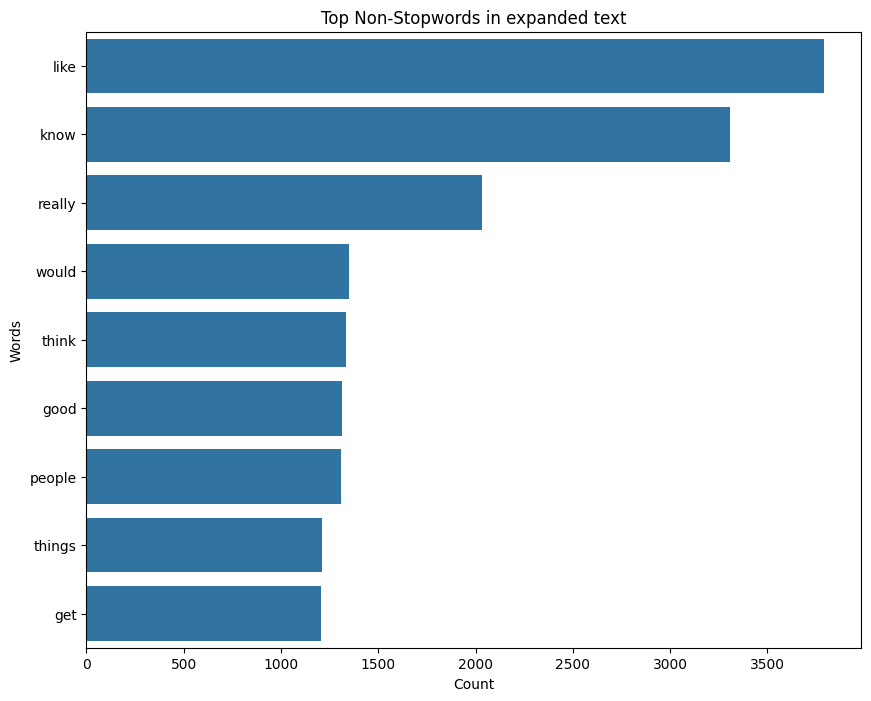

In [30]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    # Flatten the list of lists into a single list if necessary
    # Assuming 'text' is a list of lists of words; if not, comment out the next two lines
    text = [word for sublist in text for word in sublist]
    
    counter = Counter(text)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
        if word.lower() not in stop:  # Check against stopwords using lowercased words
            x.append(word)
            y.append(count)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=y, y=x)
    plt.title('Top Non-Stopwords in expanded text')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

plot_top_non_stopwords_barchart(df_combined['expanded_text'])
    

# sentiment analysis

1. rule-based 
https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

In [31]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Function to apply VADER and return the compound score
def apply_vader(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

# Assuming 'expanded_text' column is a list of words, join them into a single string per row
df_combined['expanded_text_str'] = df_combined['expanded_text'].apply(lambda x: ' '.join(x))

# Apply the VADER analysis on the joined text
df_combined['vader_sentiment'] = df_combined['expanded_text_str'].apply(apply_vader)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
mean_vader_sentiment = df_combined.groupby('depression')[['vader_sentiment']].mean()

print(mean_vader_sentiment)

            vader_sentiment
depression                 
0                  0.971945
1                  0.920295


C:\Users\katja\AppData\Local\Temp\ipykernel_24092\2037503253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_vader_sentiment = df_combined.groupby('depression')[['vader_sentiment']].mean()


Both groups show relatively high average sentiment scores, which implies that, on average, the transcripts have positive sentiment regardless of depression label. However, the depression group (1) has a slightly lower mean score than the non-depression group (0), which might suggest a subtle trend towards less positive sentiment in the speech of individuals with depression.

Most Common Words and Word Cloud

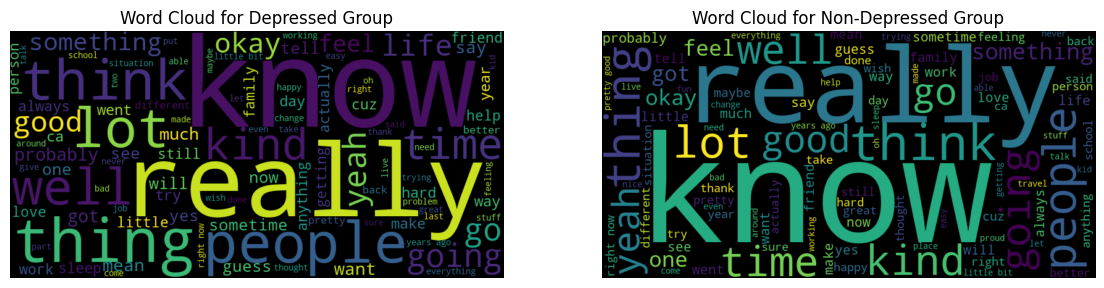

In [33]:
from collections import Counter
from wordcloud import WordCloud

# Separate text by depression label
depressed_text = ' '.join(df_combined[df_combined['depression'] == 1]['expanded_text_str'].tolist())
non_depressed_text = ' '.join(df_combined[df_combined['depression'] == 0]['expanded_text_str'].tolist())

# Generate word clouds
wordcloud_depressed = WordCloud(width=800, height=400, max_words=100).generate(depressed_text)
wordcloud_non_depressed = WordCloud(width=800, height=400, max_words=100).generate(non_depressed_text)

# Plot the word clouds side-by-side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_depressed, interpolation='bilinear')
plt.title('Word Cloud for Depressed Group')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_depressed, interpolation='bilinear')
plt.title('Word Cloud for Non-Depressed Group')
plt.axis('off')

plt.show()

2. embedding model 

In [34]:
import flair # A natural language processing (NLP) library
# specific classes from the Flair library used for building and processing sentences
from flair.models import TextClassifier
from flair.data import Sentence

# Load the sentiment classifier
classifier = TextClassifier.load('en-sentiment')

# function takes a text input, converts it into a Sentence object, and predicts its sentiment using the loaded classifier
# It returns the sentiment label (e.g., "POSITIVE" or "NEGATIVE") and the associated confidence score (a float between 0 and 1) for that prediction
def flair_sentiment(text):
    # Make sure text is a string
    sentence = Sentence(text)
    classifier.predict(sentence)
    # Flair outputs labels with additional information, extracting sentiment and score
    return sentence.labels[0].value, sentence.labels[0].score

df_combined['flair_sentiment'], df_combined['flair_score'] = zip(*df_combined['expanded_text_str'].apply(flair_sentiment))

# View the DataFrame to see the added sentiment analysis results
print(df_combined[['expanded_text_str', 'flair_sentiment', 'flair_score']])

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                     expanded_text_str flair_sentiment  \
0    so I am going to interview in Spanish okay goo...        NEGATIVE   
1    yeah there is also on Craigslist so that is wh...        POSITIVE   
2    just move around a little bit when you are fin...        POSITIVE   
3    wow okay when you are finished when she is don...        POSITIVE   
4    so we will just move around a little bit tonig...        NEGATIVE   
..                                                 ...             ...   
214  going to press that button it just means somet...        NEGATIVE   
215  hi I am not a therapist are you okay yes okay ...        POSITIVE   
216  and please are you okay with this yes doing fi...        NEGATIVE   
217  okay but but okay but I do not stop until it i...        NEGATIVE   
218  anime go ahead and start a fire camcorder reco...        NEGATIVE   

     flair_score  
0       0.898453  
1       0.830033  
2       0.613937  
3       0.989942  
4       0.990270

Interpretation
- Responses labeled as POSITIVE indicate that the text has an overall optimistic or favorable tone. These individuals may express feelings of hope, happiness, or contentment.
- Responses labeled as NEGATIVE reflect a pessimistic or unfavorable tone. This might include expressions of sadness, frustration, or hopelessness.
- flair_score: This column provides a confidence score for the sentiment prediction, indicating how certain the model is about its classification

Sentiment distribution

In [35]:
# Count the occurrences of each sentiment
sentiment_counts = df_combined['flair_sentiment'].value_counts()
total_count = len(df_combined)

# Calculate percentages
sentiment_percentage = (sentiment_counts / total_count) * 100

# Display results
print("Sentiment Distribution:")
print(sentiment_percentage)

Sentiment Distribution:
flair_sentiment
NEGATIVE    61.187215
POSITIVE    38.812785
Name: count, dtype: float64


Comparing sentiment by depression label

Mean Sentiment Scores by Depression Label:
depression
0    0.871376
1    0.892106
Name: flair_score, dtype: float64


C:\Users\katja\AppData\Local\Temp\ipykernel_24092\4115694601.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sentiment = sentiment_by_depression.groupby('depression')['flair_score'].mean()


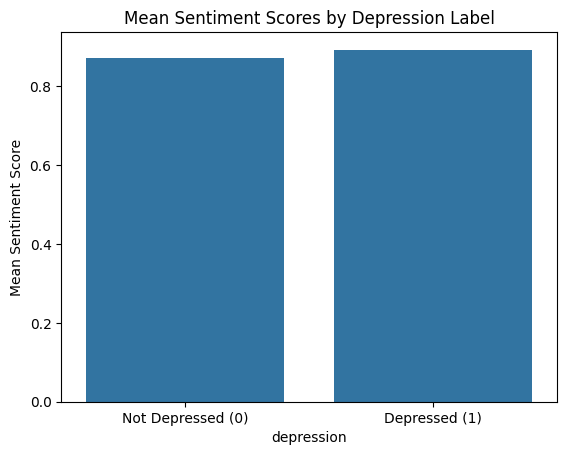

In [36]:
# Create a new DataFrame with sentiment scores and depression labels
sentiment_by_depression = df_combined[['depression', 'flair_score']]

# Calculate mean sentiment scores by depression label
mean_sentiment = sentiment_by_depression.groupby('depression')['flair_score'].mean()

# Display mean sentiment scores
print("Mean Sentiment Scores by Depression Label:")
print(mean_sentiment)

# Visualize the results
sns.barplot(x=mean_sentiment.index, y=mean_sentiment.values)
plt.xticks([0, 1], ['Not Depressed (0)', 'Depressed (1)'])
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Scores by Depression Label')
plt.show()

Both groups (depressed and not depressed) exhibit high mean sentiment scores, indicating that the language used in their responses leans towards positivity. This could suggest that even individuals experiencing depression may still express positive sentiments in certain contexts or discussions.

The mean sentiment score for the depressed group (0.892106) is higher than that of the non-depressed group (0.871376). This might seem counterintuitive because one would typically expect those who are depressed to express more negative sentiments. However, it could indicate that the topics discussed or the context of the interviews elicited positive responses even from those with depression.

In [37]:
import torch
print(torch.__version__)

2.5.0+cpu


### Emotion detection
- Aim: to identify and categorize the specific emotions expressed in text
- can classify text into multiple emotional categories (e.g. happiness, sadness, anger, fear, surprise, and disgust)
- eight primary emotions found in a paper: joy, trust, fear, surprise, sadness, aversion, anger, and anticipation

Steps for emotion detection
- choose a pre-trained model (e.g. model in the Huggung Face transformers library)
- prepare text data (if not already done) -> cleaning, tokenizing, converting in appropriate format
- apply the model
- analyze the results
    - the output typically includes a predicted emotion (dominant emotion detected in the text) and a confidence score (between 0 and 1, indicating the model's confidence in its prediction)

In [41]:
from transformers import pipeline, AutoTokenizer

# Load an emotion detection model
emotion_classifier = pipeline("text-classification", model="nateraw/bert-base-uncased-emotion")
tokenizer = AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion")

def split_text(text, max_length=512):
    # Tokenize the text to get the token count
    tokens = tokenizer.encode(text, truncation=False)
    segments = []

    # Split the tokens into segments based on the maximum length
    for i in range(0, len(tokens), max_length):
        segment_tokens = tokens[i:i + max_length]
        # Decode the token segment back to string
        segments.append(tokenizer.decode(segment_tokens, skip_special_tokens=True))

    return segments

def detect_emotion(text):
    segments = split_text(text)
    emotions = []
    
    # Collect results from all segments
    for segment in segments:
        # Ensure that we only classify segments within the limit
        if len(tokenizer.encode(segment)) <= 512 and segment.strip():
            emotions.extend(emotion_classifier(segment))
    return emotions

# Apply emotion detection to your data
try:
    df_combined['emotion'] = df_combined['expanded_text_str'].apply(detect_emotion)
except RuntimeError as e:
    print(f"An error occurred during emotion detection: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Check if 'emotion' column was created before trying to print it
if 'emotion' in df_combined.columns:
    print(df_combined[['expanded_text_str', 'emotion']])
else:
    print("The 'emotion' column was not created successfully.")


                                     expanded_text_str  \
0    so I am going to interview in Spanish okay goo...   
1    yeah there is also on Craigslist so that is wh...   
2    just move around a little bit when you are fin...   
3    wow okay when you are finished when she is don...   
4    so we will just move around a little bit tonig...   
..                                                 ...   
214  going to press that button it just means somet...   
215  hi I am not a therapist are you okay yes okay ...   
216  and please are you okay with this yes doing fi...   
217  okay but but okay but I do not stop until it i...   
218  anime go ahead and start a fire camcorder reco...   

                                               emotion  
0    [{'label': 'anger', 'score': 0.7366102933883667}]  
1      [{'label': 'joy', 'score': 0.9923581480979919}]  
2     [{'label': 'love', 'score': 0.5547837615013123}]  
3      [{'label': 'joy', 'score': 0.9932920932769775}]  
4      [{'label': 

Emotion frequencies

emotion
joy         164
sadness      25
anger        13
love         11
surprise      3
fear          3
Name: count, dtype: int64


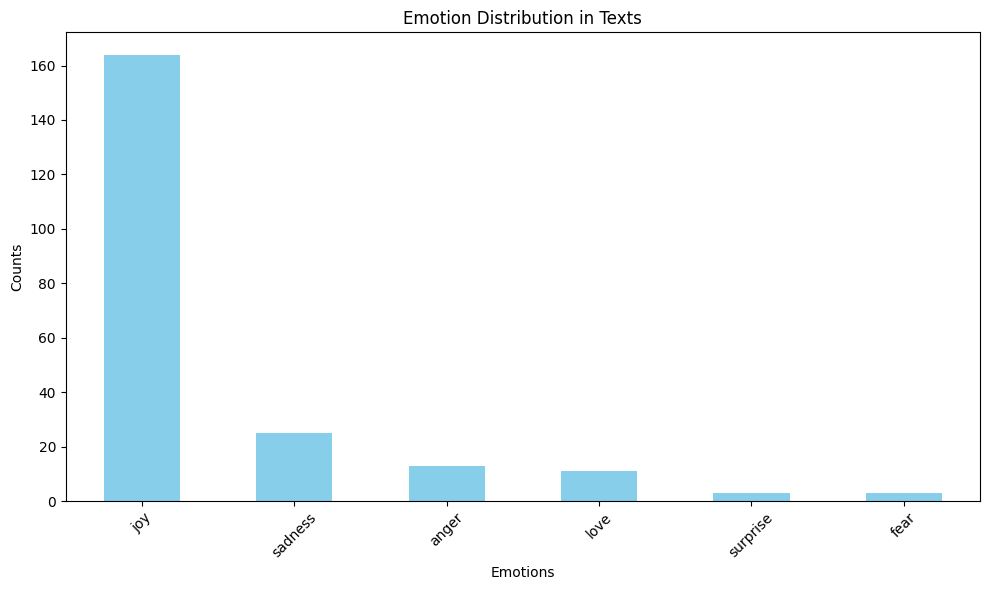

In [43]:
# Extract the most confident emotion from each entry
# Flattening the emotions into a list of (label, score) pairs
emotion_labels = []
for entry in df_combined['emotion']:
    if entry:  # Check if the emotion entry is not empty
        # Get the most confident emotion label (the first one in the list)
        label = entry[0]['label']
        emotion_labels.append(label)

# Create a DataFrame from the labels
emotion_df = pd.DataFrame(emotion_labels, columns=['emotion'])

# Count the frequency of each emotion
emotion_counts = emotion_df['emotion'].value_counts()

# Display the counts
print(emotion_counts)

# Plot the emotion counts
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Texts')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

### Topic modeling
- technique used to discover abstract topics within a collection of documents
- helps in understanding what themes or subjects are present in the text data without requiring labels for the data

Steps
- Preprocess the text: Clean the text data by tokenizing, removing stop words, and stemming/lemmatization
- Create a dictionary and corpus: A dictionary maps each word to a unique ID, while a corpus represents the texts as bag-of-words (frequency of each word in each document)
- Apply a topic modeling algorithm: Use an algorithm like Latent Dirichlet Allocation (LDA) to find topics in the corpus. LDA assumes that each document is a mixture of topics and each topic is a mixture of words.
- Analyze the topics: Review the generated topics, which typically consist of the most frequent words associated with each topic.

In [44]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import nltk

# Ensure you have NLTK stopwords downloaded
nltk.download('stopwords')

# Example pre-processing function
def preprocess_text(text):
    # Tokenize, remove stop words, and lowercase
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
    return tokens

# Preprocess your texts
df_combined['tokens'] = df_combined['expanded_text_str'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df_combined['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_combined['tokens']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.027*"like" + 0.026*"know" + 0.015*"really" + 0.011*"people" + 0.011*"good" + 0.011*"think" + 0.010*"things" + 0.010*"would" + 0.010*"get" + 0.009*"time"
Topic 1: 0.033*"like" + 0.011*"know" + 0.010*"really" + 0.010*"yeah" + 0.009*"think" + 0.009*"would" + 0.009*"get" + 0.007*"go" + 0.007*"guess" + 0.007*"good"
Topic 2: 0.001*"wife" + 0.001*"standards" + 0.001*"patient" + 0.001*"dolphins" + 0.001*"punish" + 0.001*"generate" + 0.001*"greece" + 0.001*"character" + 0.001*"breathe" + 0.001*"development"
Topic 3: 0.032*"know" + 0.026*"like" + 0.013*"really" + 0.012*"yeah" + 0.010*"good" + 0.009*"people" + 0.009*"would" + 0.008*"going" + 0.007*"things" + 0.007*"pretty"
Topic 4: 0.028*"like" + 0.021*"know" + 0.019*"really" + 0.011*"would" + 0.010*"think" + 0.009*"things" + 0.008*"good" + 0.008*"lot" + 0.008*"going" + 0.008*"get"


### Symptoms detection
similar to emotion detection

In [46]:
# Define symptoms
symptoms = [
    "sadness", "pessimism", "past failure", "loss of pleasure", "guilty feeling", 
    "punishment feeling", "self-dislike", "self-criticalness", "suicidal thoughts", 
    "crying", "agitation", "loss of interest", "indecisiveness", "worthlessness", 
    "loss of energy", "changes in sleeping pattern", "irritability", "changes in appetite", 
    "concentration difficulty", "tiredness"
]

# Function to detect symptoms
def detect_symptoms(text):
    detected_symptoms = []
    for symptom in symptoms:
        if symptom in text.lower():  # Convert to lowercase for case insensitive matching
            detected_symptoms.append(symptom)
    return detected_symptoms

# Apply symptom detection to your data
df_combined['detected_symptoms'] = df_combined['expanded_text_str'].apply(detect_symptoms)

# View the results
print(df_combined[['expanded_text_str', 'detected_symptoms']])

                                     expanded_text_str detected_symptoms
0    so I am going to interview in Spanish okay goo...                []
1    yeah there is also on Craigslist so that is wh...                []
2    just move around a little bit when you are fin...                []
3    wow okay when you are finished when she is don...                []
4    so we will just move around a little bit tonig...                []
..                                                 ...               ...
214  going to press that button it just means somet...                []
215  hi I am not a therapist are you okay yes okay ...                []
216  and please are you okay with this yes doing fi...                []
217  okay but but okay but I do not stop until it i...    [irritability]
218  anime go ahead and start a fire camcorder reco...                []

[219 rows x 2 columns]


        Symptom  Count
0        crying      8
1       sadness      4
2  irritability      1


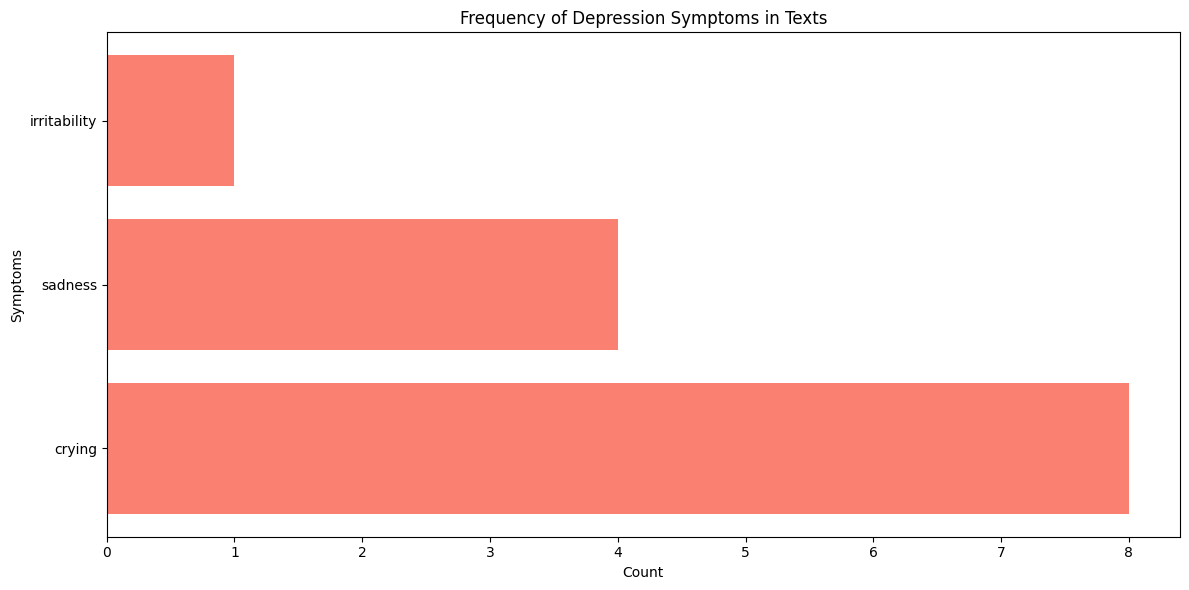

In [47]:
# Visualization of results
# Count occurrences of each symptom
symptom_counts = {}

# Aggregate counts
for symptoms_list in df_combined['detected_symptoms']:
    for symptom in symptoms_list:
        if symptom in symptom_counts:
            symptom_counts[symptom] += 1
        else:
            symptom_counts[symptom] = 1

# Convert to DataFrame for better visualization
symptom_counts_df = pd.DataFrame(list(symptom_counts.items()), columns=['Symptom', 'Count'])

# Display the counts
print(symptom_counts_df)

# Plot the symptom counts
plt.figure(figsize=(12, 6))
symptom_counts_df.sort_values('Count', ascending=False, inplace=True)  # Sort by count
plt.barh(symptom_counts_df['Symptom'], symptom_counts_df['Count'], color='salmon')
plt.title('Frequency of Depression Symptoms in Texts')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.tight_layout()  # Adjust layout
plt.show()